In [1]:
import numpy as np
import pandas as pd

In [2]:
import random

n = 100000

age = [random.randint(1, 100) for i in range(n)]
gender = [random.choice(['male', 'female','trans']) for i in range(n)]

# adding columns using pandas
df = pd.DataFrame(age, columns=['age'])
df['gender'] = gender
df['age_bracket'] = ['young' if i < 30 else 'mid' if i < 50 else 'old' for i in df.age]

df['height'] = [random.random() +  random.choice([1, 1.5]) for i in range(n)]
df['weight'] = [random.normalvariate(50, 7) for i in range(n)]

df.head()

,age,gender,age_bracket,height,weight
0,38,male,mid,1.529625,64.823845
1,79,female,old,1.428620,46.356114
2,24,trans,young,1.975857,50.830193
3,27,trans,young,2.001872,58.065479
4,15,trans,young,1.821681,48.419702


In [3]:
# subset the data
filter_1 = ['age', 'gender']

df[filter_1].head(2)

,age,gender
0,38,male
1,79,female


In [4]:
# using a specific column
filter_2 = df.age_bracket == 'old'

df[filter_2].head(2)

,age,gender,age_bracket,height,weight
1,79,female,old,1.428620,46.356114
6,54,female,old,2.015278,53.894545


In [5]:
# Descriptive analysis
df.describe()



,age,height,weight
count,100000.000000,100000.000000,100000.000000
mean,50.430530,1.749417,50.006332
std,28.802986,0.381706,6.995910
min,1.000000,1.000017,20.362862
25%,25.000000,1.500704,45.253411
50%,50.000000,1.748541,49.980465
75%,75.000000,2.000191,54.772232
max,100.000000,2.499964,80.959774


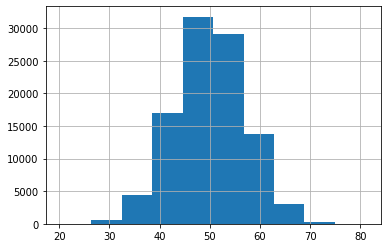

In [6]:
df.weight.hist()

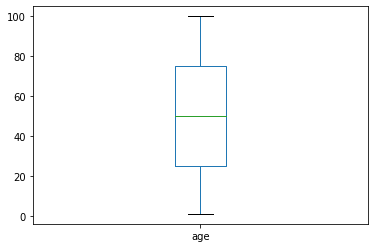

In [7]:
df.plot(y='age', x='age_bracket', kind='box')

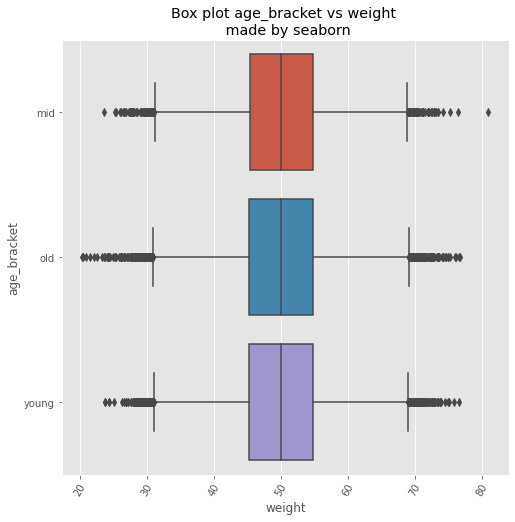

In [8]:
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(8, 8))
sns.boxplot(data= df, y='age_bracket', x='weight')

plt.title('Box plot age_bracket vs weight \n made by seaborn' )
plt.xticks(rotation=60)

plt.show()

In [9]:
# Numpy
weight = [random.normalvariate(50, 7) for i in range(n)]
array = np.array([[age, weight]])

array.shape

(1, 2, 100000)

In [10]:
arr = np.random.randint(0,10, (100, 3))
arr.shape

(100, 3)

In [11]:
dt = pd.DataFrame(arr, columns=['c1', 'c2', 'c3'])
dt.head()

,c1,c2,c3
0,8,4,7
1,6,7,9
2,4,9,2
3,7,6,9
4,6,4,8


In [12]:

dt.iloc[0:2,1:3]

,c2,c3
0,4,7
1,7,9


In [13]:
arr[0:5, 1:3]

array([[4, 7],
       [7, 9],
       [9, 2],
       [6, 9],
       [4, 8]])

In [14]:
#arr[0,0] = np.nan
arr.mean(axis=0)

array([4.72, 4.74, 4.38])

In [15]:
# df.mean(axis=0)

In [16]:
# Scikit Learn / Machine Learning

df['BMI'] = df.weight / df.height ** 2
df.head()

,age,gender,age_bracket,height,weight,BMI
0,38,male,mid,1.529625,64.823845,27.705429
1,79,female,old,1.428620,46.356114,22.712949
2,24,trans,young,1.975857,50.830193,13.019997
3,27,trans,young,2.001872,58.065479,14.489227
4,15,trans,young,1.821681,48.419702,14.590746


In [17]:
X = ['height', 'weight']
X = df[X]

Y = df.BMI

In [18]:
# validate model / test model performance
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [19]:
x_train.shape

(80000, 2)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [21]:
model.predict(np.array([2,83]).reshape(1, -1))

array([25.88555947])

In [22]:
print(83 /4)

20.75


In [23]:
df.shape

(100000, 6)

In [24]:
pred = model.predict(x_test)
pred

array([24.38866621, 18.30615688, 25.58400134, ..., 15.81419609,
        4.27990508, 19.34043464])

In [25]:
mean = mean_squared_error(pred, y_test)
mean

14.370282313111995